Goal using the data obtained from ElectricVehicles.ipynb we will use ElectricVehicles.csv to create a model predicting range.
Multiple models will be made in an effort to balance accuracy with variable count. 

In [1]:
import matplotlib as plt
import pandas as pd
import sklearn.model_selection as skms
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
Electric_Vehicles = pd.read_csv(r'C:\Users\harme\ElectricVehiclesNumerized.csv')
Electric_Vehicles

,brand,model,top_speed_kmh,battery_capacity_kWh,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,fast_charge_port,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,0,45,155,37.8,235.0,156,225,7.0,67.0,0,0.0,185,4,1,1,3673,1683,1518,1,76
1,0,46,155,37.8,235.0,149,225,7.0,67.0,0,0.0,185,4,1,1,3673,1683,1518,1,75
2,0,50,200,50.8,345.0,158,280,5.9,79.0,0,0.0,360,5,1,6,4187,1779,1557,3,340
3,0,51,200,50.8,345.0,158,280,6.2,79.0,0,0.0,360,5,1,6,4187,1779,1557,3,339
4,1,319,150,50.8,260.0,128,320,9.0,85.0,0,0.0,400,5,1,6,4173,1781,1532,3,231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,51,55,210,94.0,710.0,173,450,3.8,260.0,0,2000.0,539,5,0,8,4787,1930,1650,3,361
438,51,56,210,71.0,440.0,148,365,6.0,240.0,0,2000.0,539,5,2,8,4787,1930,1650,3,359
439,51,371,190,49.0,343.0,148,265,5.9,70.0,0,1600.0,362,5,2,6,4432,1836,1566,3,438
440,51,372,190,65.0,343.0,146,360,5.6,114.0,0,1600.0,362,5,2,6,4432,1836,1566,3,439


Looking at the Significant Pairs for range and efficiency from ElectricVehicles.ipynb we can narrow what data to use for each respective models. But first we need to split the data into training and test data, we will go for a 80/20 split between training and test data. 

In [3]:
train, test = skms.train_test_split(Electric_Vehicles, test_size = .2)
print(len(train))
print(len(test))

353
89


Setting the predictors all predictors will be included that have a sufficent p-value (see chuck 30 of ElectricVehicles.ipynb), the predictors will later be changed to fewer predictors to reduce predictors that act similarly such as top speed and acceleration. 

In [4]:

rangepredictors = ['battery_capacity_kWh', 'top_speed_kmh', 'fast_charging_power_kw_dc', 'torque_nm', 'width_mm', 'length_mm', 'towing_capacity_kg',
                  'car_body_type', 'cargo_volume_l', 'drivetrain', 'seats', 'height_mm', 'acceleration_0_100_s']

In [5]:
range_train = train[rangepredictors]
range_test = test[rangepredictors]
range_true_train = train['range_km']
range_true_test = test['range_km']

In [6]:
rangemodel = sm.OLS(range_true_train, range_train).fit()
print(rangemodel.summary())

                                 OLS Regression Results                                
Dep. Variable:               range_km   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              4651.
Date:                Wed, 13 Aug 2025   Prob (F-statistic):                        0.00
Time:                        15:23:11   Log-Likelihood:                         -1709.8
No. Observations:                 353   AIC:                                      3446.
Df Residuals:                     340   BIC:                                      3496.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

A few things to note in the model summary, first the R^2 both not adj. and adj. is very high, along with a low p-value, showing that the model is doing a good job with the test data. 
Second there are a few values that seem to have high individual p-values, namely fast_charging, length, cargo_volume, and acceleration all exceeding .5
Third there seems to be a strong multicollinearity, this may be due to correlation between variables like speed and accelertion, or width and length. However we will test to see which variables have the highest VIF (Variance Inflation Factor). 

In [7]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(range_train.values, i) for i in range(range_train.values.shape[1])]
vif["features"] = range_train.columns
print(vif.round(1))

    VIF Factor                   features
0         67.9       battery_capacity_kWh
1        226.6              top_speed_kmh
2         18.9  fast_charging_power_kw_dc
3         40.3                  torque_nm
4       1732.5                   width_mm
5       1304.4                  length_mm
6          5.0         towing_capacity_kg
7         13.8              car_body_type
8         16.5             cargo_volume_l
9          4.0                 drivetrain
10        92.9                      seats
11       638.4                  height_mm
12        50.5       acceleration_0_100_s


The VIF is high for a good chuck of the variables so to start in addition to the 4 variables with a high p-value, width, and height will also be removed.

In [8]:
range_prediction = rangemodel.predict(range_test)

Using the test data we can see how the model behaves when predicting data it does not contain.

In [9]:
prediction_vs_true_range = pd.concat([range_prediction, range_true_test], axis = 1)
prediction_vs_true_range.columns = ['predicted_range_km', 'true_range_km']

In [10]:
pd.set_option('display.max_rows', None)
prediction_vs_true_range

,predicted_range_km,true_range_km
22,418.462860,395
310,539.940659,565
121,264.816049,275
343,352.142161,370
70,455.904520,430
243,333.554352,380
104,263.246294,260
377,233.027772,230
110,317.289234,305
18,343.643750,325


Initial glance through the predicted vs the true range, it seem like the model has a mix of over and underestimating the range of different electric vehicles with a few ranges being wildly inaccurate (50+km). 

23.587541146267537
15.695102300061592
385.0
390.0


<Axes: xlabel='rownumber'>

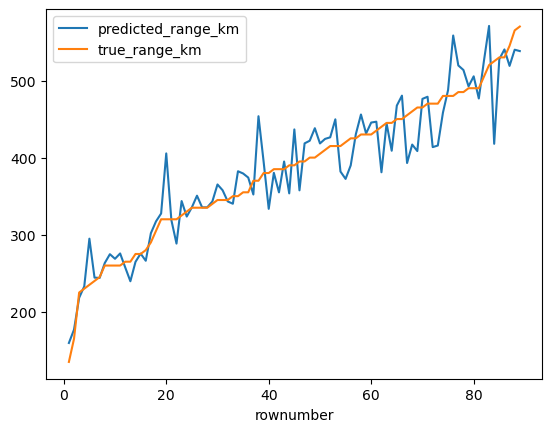

In [11]:
print(abs((prediction_vs_true_range['true_range_km']-prediction_vs_true_range['predicted_range_km'])).mean())
print(abs((prediction_vs_true_range['true_range_km']-prediction_vs_true_range['predicted_range_km'])).median())
print(prediction_vs_true_range['true_range_km'].mean())
print(prediction_vs_true_range['true_range_km'].median())
plotrange = prediction_vs_true_range.sort_values(by='true_range_km')
rownumber = []
n = 0
for row in plotrange.iterrows():
    n=n+1
    rownumber.append(n)
plotrange['rownumber'] = rownumber
plotrange.plot(x='rownumber', y = ['predicted_range_km','true_range_km'])

Looking that the mean and median difference, it seems that the wildly inaccurate prediction is significantly changing the mean with it being around 8km higher than the median. However the skew between the mean and median electric vehicle range seems to be slightly less at 5km.
Compared to the mean prediction gap to the mean range, the prediction is around 6.1% of the mean range. The median prediction gap compared to the median car range, the prediction is around 4% of the median.

Looking at the graph comparing predicted vs true range, it seems like the model is tracking the differences between high range and low range vehicles relatively well, however the major spike up and down are of concern, but may be fixed with a higher sample sized with some companies having unqiue designs or focuses (bare bones vs. car with a lot of space, or performance vs. efficiency think a Prius vs. a Sports Car). 

The model will now be revised by changing a few variables, this will most likely reduce accuracy but keep the more important variables

In [12]:

rangepredictors = ['battery_capacity_kWh', 'top_speed_kmh', 'torque_nm', 'towing_capacity_kg',
                  'car_body_type', 'drivetrain', 'seats']
range_train = train[rangepredictors]
range_test = test[rangepredictors]
rangemodel = sm.OLS(range_true_train, range_train).fit()
print(rangemodel.summary())

                                 OLS Regression Results                                
Dep. Variable:               range_km   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              5201.
Date:                Wed, 13 Aug 2025   Prob (F-statistic):                        0.00
Time:                        15:23:12   Log-Likelihood:                         -1801.7
No. Observations:                 353   AIC:                                      3617.
Df Residuals:                     346   BIC:                                      3644.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In this new model we still retain a high r^2 both unadj. and adj. along with a low model p-value, however towing_capacity has become insignificant with car_body_type on the border. 
Multicollineaity is also still a problem as seeing individual variable impacts on range could provide valuable insights. 

In [13]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(range_train.values, i) for i in range(range_train.values.shape[1])]
vif["features"] = range_train.columns
print(vif.round(1))

   VIF Factor              features
0        46.7  battery_capacity_kWh
1        51.2         top_speed_kmh
2        29.5             torque_nm
3         4.0    towing_capacity_kg
4         9.4         car_body_type
5         3.9            drivetrain
6        20.0                 seats


Top_speed and battery capacity have the largest VIF, however the seeming importance of a battery in an electric vehicle will warrent a second model to be made with changes removing torque instead of battery capacity

28.90247140102461
25.161605753570257
385.0
390.0


<Axes: xlabel='rownumber'>

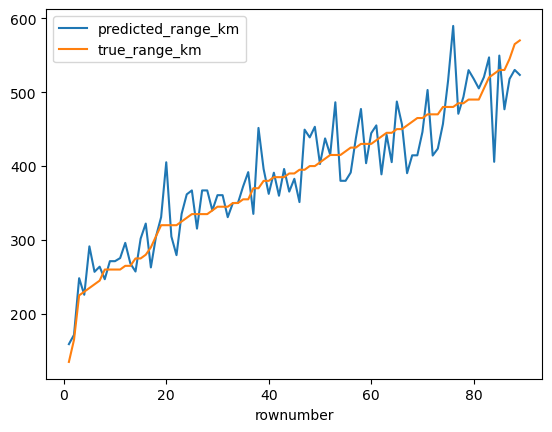

In [14]:
range_prediction = rangemodel.predict(range_test)
prediction_vs_true_range = pd.concat([range_prediction, range_true_test], axis = 1)
prediction_vs_true_range.columns = ['predicted_range_km', 'true_range_km']
plotrange = prediction_vs_true_range.sort_values(by='true_range_km')
print(abs((prediction_vs_true_range['true_range_km']-prediction_vs_true_range['predicted_range_km'])).mean())
print(abs((prediction_vs_true_range['true_range_km']-prediction_vs_true_range['predicted_range_km'])).median())
print(prediction_vs_true_range['true_range_km'].mean())
print(prediction_vs_true_range['true_range_km'].median())
rownumber = []
n = 0
for row in plotrange.iterrows():
    n=n+1
    rownumber.append(n)
plotrange['rownumber'] = rownumber
plotrange.plot(x='rownumber', y = ['predicted_range_km','true_range_km'])

The mean and median prediction gap has increased however the mean and median prediction gaps has significantly come closer together, which means there were errors in the data (maybe companies who didn't report a certain piece of information got autocomplete to 0), or that the previous variable were unreliable for a handful of vehicles. The model will be reduce further however the prediction gap with the true range, will likely render the next 2 models has too inaccurate for use. Instead experimenting why a higher VIF for a variable might be needed if a variable is important, in this case the electric vehicle battery vs. the torque. 

                                 OLS Regression Results                                
Dep. Variable:               range_km   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.962
Method:                 Least Squares   F-statistic:                              2207.
Date:                Wed, 13 Aug 2025   Prob (F-statistic):                   2.88e-246
Time:                        15:23:12   Log-Likelihood:                         -2048.2
No. Observations:                 353   AIC:                                      4104.
Df Residuals:                     349   BIC:                                      4120.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

<Axes: xlabel='rownumber'>

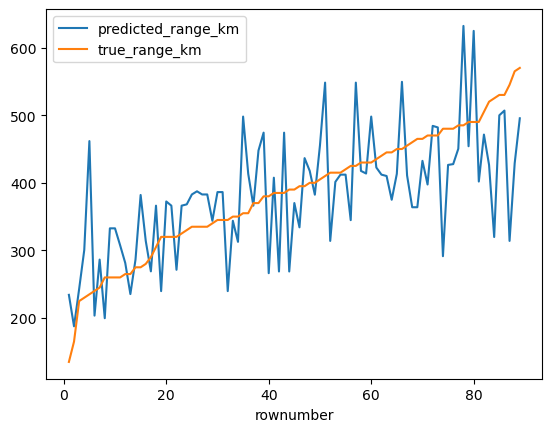

In [15]:
rangepredictors = ['torque_nm',
                  'car_body_type', 'drivetrain', 'seats']
range_train = train[rangepredictors]
range_test = test[rangepredictors]
rangemodel = sm.OLS(range_true_train, range_train).fit()
print(rangemodel.summary())
range_prediction = rangemodel.predict(range_test)
prediction_vs_true_range = pd.concat([range_prediction, range_true_test], axis = 1)
prediction_vs_true_range.columns = ['predicted_range_km', 'true_range_km']
print(abs((prediction_vs_true_range['true_range_km']-prediction_vs_true_range['predicted_range_km'])).mean())
print(abs((prediction_vs_true_range['true_range_km']-prediction_vs_true_range['predicted_range_km'])).median())
print(prediction_vs_true_range['true_range_km'].mean())
print(prediction_vs_true_range['true_range_km'].median())
plotrange = prediction_vs_true_range.sort_values(by='true_range_km')
rownumber = []
n = 0
for row in plotrange.iterrows():
    n=n+1
    rownumber.append(n)
plotrange['rownumber'] = rownumber
plotrange.plot(x='rownumber', y = ['predicted_range_km','true_range_km'])

                                 OLS Regression Results                                
Dep. Variable:               range_km   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              6208.
Date:                Wed, 13 Aug 2025   Prob (F-statistic):                   9.39e-323
Time:                        15:23:12   Log-Likelihood:                         -1870.0
No. Observations:                 353   AIC:                                      3748.
Df Residuals:                     349   BIC:                                      3763.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

<Axes: xlabel='rownumber'>

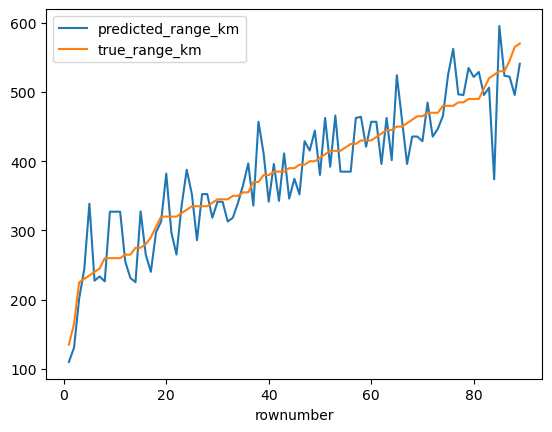

In [16]:
rangepredictors = ['battery_capacity_kWh', 
                  'car_body_type', 'drivetrain', 'seats']
range_train = train[rangepredictors]
range_test = test[rangepredictors]
rangemodel = sm.OLS(range_true_train, range_train).fit()
print(rangemodel.summary())
range_prediction = rangemodel.predict(range_test)
prediction_vs_true_range = pd.concat([range_prediction, range_true_test], axis = 1)
prediction_vs_true_range.columns = ['predicted_range_km', 'true_range_km']
print(abs((prediction_vs_true_range['true_range_km']-prediction_vs_true_range['predicted_range_km'])).mean())
print(abs((prediction_vs_true_range['true_range_km']-prediction_vs_true_range['predicted_range_km'])).median())
print(prediction_vs_true_range['true_range_km'].mean())
print(prediction_vs_true_range['true_range_km'].median())
plotrange = prediction_vs_true_range.sort_values(by='true_range_km')
rownumber = []
n = 0
for row in plotrange.iterrows():
    n=n+1
    rownumber.append(n)
plotrange['rownumber'] = rownumber
plotrange.plot(x='rownumber', y = ['predicted_range_km','true_range_km'])

Looking at both models both have a relativly high r^2 values and a low p-value, both also have car_body_type becoming insignificant.

Dispite battery capacity having a higher VIF it seems keeping battery capacity instead of the torque lowered the multicollinearity more, and had a lower prediction gap but also prediction mean and median gap lower. However both models are much more inaccurate compared to the first 2 models. 
